#Libraries, Directory and data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Directory
%cd /content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching

/content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching


In [3]:
#install library
!pip install CausalInference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.3 MB/s eta 0:00:00


In [4]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
from causalinference import CausalModel

In [5]:
#Data
df = pd.read_csv("school.csv")
df = df.iloc[:,1:]
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


# Data Analysis

In [6]:
# Compare both groups
df.groupby('catholic').mean(numeric_only = True)

,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized
catholic,,,,,,,,,
0,1.106246,37.794621,40.134919,43.909495,42.590520,65393.928540,0.101578,0.045566,0.163128
1,1.073118,39.775269,42.007527,47.620871,45.908269,86180.625269,0.016129,0.006452,0.219685


In [7]:
#t-test
group1 = df.where(df.catholic == 0).dropna()['income']
group2 = df.where(df.catholic == 1).dropna()['income']
stat, p= ss.ttest_ind(group1, group2)
print(p)

5.943636213205364e-41


In [8]:
#Get the continuous variables
continuous = ["number_places_lived", "mom_age", "dad_age",
              "mom_score", "dad_score", "income"]

#storing results
stat = {}
p = {}

#loop
for x in continuous:
  group1 = df.where(df.catholic == 0).dropna()[x]
  group2 = df.where(df.catholic == 1).dropna()[x]
  stat[x], p[x]= ss.ttest_ind(group1, group2)
ttests = pd.DataFrame.from_dict(p, orient = "Index")
ttests.columns = ["pvalue"]
print(ttests)

                           pvalue
number_places_lived  7.072609e-03
mom_age              1.359492e-22
dad_age              3.344265e-16
mom_score            2.280116e-19
dad_score            5.489722e-18
income               5.943636e-41


In [9]:
#chi-square
tab = pd.crosstab(index = df.poverty,
                  columns = df.catholic)
stat, p, dof, exp = ss.chi2_contingency(tab)
print(p)

6.511354893726035e-17


In [10]:
#what to loop
categorical = ["poverty", "food_stamps"]

#where to store
p = {}

#loop
for y in categorical:
  tab = pd.crosstab(index = df[y],
                  columns = df.catholic)
  stat, p[y], dof, exp = ss.chi2_contingency(tab)
chisquare = pd.DataFrame.from_dict(p, orient = "Index")
chisquare.columns = ["pvalue"]
print(chisquare)

                   pvalue
poverty      6.511355e-17
food_stamps  3.294153e-08


In [11]:
#Race variable
df.race.value_counts()

WHITE, NON-HISPANIC                        3654
HISPANIC, RACE NOT SPECIFIED                408
HISPANIC, RACE SPECIFIED                    387
BLACK OR AFRICAN AMERICAN, NON-HISPANIC     357
ASIAN                                       342
MORE THAN ONE RACE, NON HISPANIC            123
NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER      93
AMERICAN INDIAN OR ALASKA NATIVE             62
NOT ASCERTAINED                               3
Name: race, dtype: int64

In [12]:
#Transforming race variable
df['race_white'] = np.where(df.race == 'WHITE, NON-HISPANIC', 1, 0)
df['race_hispanic'] = np.where((df.race == 'HISPANIC, RACE NOT SPECIFIED') |
                               (df.race == 'HISPANIC, RACE SPECIFIED'), 1, 0)
df['race_black'] = np.where(df.race == 'BLACK OR AFRICAN AMERICAN, NON-HISPANIC', 1, 0)
df['race_asian'] = np.where(df.race == 'ASIAN', 1, 0)

In [13]:
#Education variable overview
df.mom_education.value_counts()

SOME COLLEGE                              1721
HIGH SCHOOL DIPLOMA/EQUIVALENT            1306
BACHELOR'S DEGREE                         1085
MASTER'S DEGREE (MA, MS)                   387
VOC/TECH PROGRAM                           294
9TH - 12TH GRADE                           222
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE     170
8TH GRADE OR BELOW                         134
DOCTORATE OR PROFESSIONAL DEGREE           110
Name: mom_education, dtype: int64

In [14]:
#Transforming education variable
df["dad_higher_education"] = np.where((df.dad_education == "BACHELOR'S DEGREE") |
                                      (df.dad_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.dad_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)
df["mom_higher_education"] = np.where((df.mom_education == "BACHELOR'S DEGREE") |
                                      (df.mom_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.mom_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)

In [15]:
df.head(1)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.5,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0


In [16]:
#Clean the df
df = df.drop(columns = ["race", "dad_education", "mom_education"])
df.head(1)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0,1,47,45,53.5,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0


In [17]:
#Isolate confounders, treat, y
treat = df.catholic.values
y = df.score_standardized.values
confounders = df.drop(columns = ["catholic", "score_standardized"]).values

In [18]:
#Logist Regression
import statsmodels.api as sm
confounders_csr = sm.add_constant(confounders)
csr_model = sm.Logit(treat, confounders_csr).fit()
print(csr_model.summary())

Optimization terminated successfully.
         Current function value: 0.430983
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5429
Model:                          Logit   Df Residuals:                     5414
Method:                           MLE   Df Model:                           14
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                 0.05888
Time:                        14:27:19   Log-Likelihood:                -2339.8
converged:                       True   LL-Null:                       -2486.2
Covariance Type:            nonrobust   LLR p-value:                 3.835e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3412      0.418    -10.380      0.000      -5.161      -3.521
x1            -0.1666      0.

In [19]:
#predictions
probabilities = csr_model.predict(confounders_csr)
probabilities

array([0.26041384, 0.17273291, 0.24596599, ..., 0.23182116, 0.12192314,
       0.1825144 ])

In [21]:
# Create an object with the treat and the probabilities
df_prob = np.vstack([treat, probabilities])
df_prob = np.transpose(df_prob)
df_prob

array([[0.        , 0.26041384],
       [0.        , 0.17273291],
       [0.        , 0.24596599],
       ...,
       [0.        , 0.23182116],
       [0.        , 0.12192314],
       [0.        , 0.1825144 ]])

In [24]:
# Distinguish between treated and non treated
non_treated = df_prob[:,0] == 0
non_treated = df_prob[non_treated, 1]
treated = df_prob[:,0] == 1
treated = df_prob[treated, 1]

<Axes: ylabel='Density'>

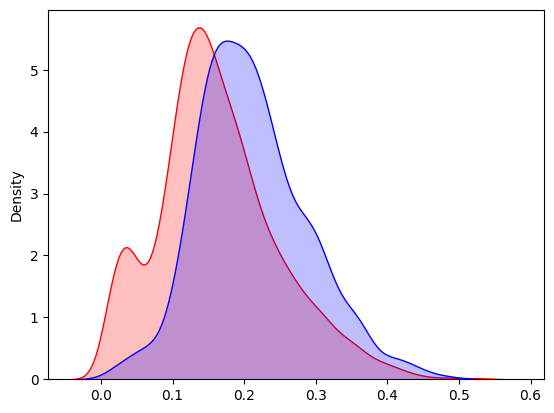

In [26]:
# Common Support Region
sns.kdeplot(non_treated, fill = True, color = 'red')
sns.kdeplot(treated, fill = True, color = 'blue')

#Matching Model

In [ ]:
#Matching model
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj = True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.133      0.065     -2.044      0.041     -0.260     -0.005
           ATC     -0.126      0.073     -1.737      0.082     -0.268      0.016
           ATT     -0.167      0.060     -2.786      0.005     -0.284     -0.049



/usr/local/lib/python3.7/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


#Robustness check - repeated samples

In [ ]:
#isolate the coefficient
model.estimates['matching']['ate']

-0.1329719287336244

In [ ]:
#While loop
ate = {}
i = 0

#loop
while i < 1000:
  #sampling
  sample = df.sample(1000)

  #isolation of treat, y and confounders
  treat = sample.catholic.values
  y = sample.score_standardized.values
  confounders = sample.drop(columns = ["catholic",
                                       "score_standardized"]).values

  #matching model
  model = CausalModel(y, treat, confounders)
  model.est_via_matching(bias_adj = True)

  #store the results
  ate[i] = model.estimates['matching']['ate']

  print(i)
  i += 1

AxesSubplot(0.125,0.125;0.775x0.755)
-0.12519302640749397


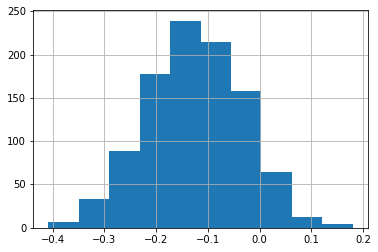

In [ ]:
#Visualize results
ate = pd.Series(ate)
print(ate.hist())
print(ate.mean())

#Robustness check - removing 1 confounder

In [ ]:
df.columns

Index(['catholic', 'number_places_lived', 'mom_age', 'dad_age', 'mom_score',
       'dad_score', 'income', 'poverty', 'food_stamps', 'score_standardized',
       'race_white', 'race_hispanic', 'race_black', 'race_asian',
       'dad_higher_education', 'mom_higher_education'],
      dtype='object')

In [ ]:
#new confounder list
treat = df.catholic.values
y = df.score_standardized.values
confounders = df.drop(columns = ["catholic",
                                 "score_standardized",
                                 "number_places_lived"]).values

In [ ]:
#Matching model
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj = True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.137      0.066     -2.069      0.039     -0.266     -0.007
           ATC     -0.136      0.074     -1.842      0.065     -0.281      0.009
           ATT     -0.141      0.060     -2.348      0.019     -0.259     -0.023



/usr/local/lib/python3.7/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef
